In [1]:
# for doing linear algebraic manipulations on data
import numpy as np
#for data preprocessing and importing csv
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
# to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# now import the dataset
df1 = pd.read_csv('1429_1.csv', delimiter=',', low_memory = False)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 34660 rows and 21 columns


In [3]:
# since we only need specific to our application so see the data and remove the unnecessary columns
df1.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [4]:
list(df1.columns)

['id',
 'name',
 'asins',
 'brand',
 'categories',
 'keys',
 'manufacturer',
 'reviews.date',
 'reviews.dateAdded',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.userCity',
 'reviews.userProvince',
 'reviews.username']

<font color='purple'>The above columns are self explanatory but if you it is tough to get insight of what that particular column is all about then seperately print that df1['column_name'] and see.

For our application we only need information about review_text, product name, user recommendation and number of people found that review helpful.Therefore, I am dropping other columns and reducing the dataset to only four columns, i.e., ‘name’, ‘reviews.text’, ‘reviews.doRecommend’, and ‘reviews.numHelpful’:</font>

In [5]:
df1 = df1[['name', 'reviews.text', 'reviews.doRecommend', 'reviews.numHelpful']]
print('shape of the data-->', df1.shape)
df1.head(10)

shape of the data--> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This amazon fire 8 inch tablet is the perfect ...,True,0.0
6,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Great for e-reading on the go, nice and light ...",True,0.0
7,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","I gave this as a Christmas gift to my inlaws, ...",True,0.0
8,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Great as a device to read books. I like that i...,True,0.0
9,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I love ordering books and reading them with th...,True,0.0


In [6]:
# Let’s see if there are any null values present in our dataset
df1.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [7]:
# There are a few null values in the dataset. So, let’s drop these null values and proceed further
df1.dropna(inplace = True)
df1.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

<font color='purple'>I am only considering those products that have at least 200 reviews. I am doing this to make sure that I have a sufficient number of reviews for each product. Here, we will use lambda functions with filter() to filter our dataset.</font>

In [8]:
df1 = df1.groupby('name').filter(lambda x:len(x)>200).reset_index(drop = True)
#print to see how many are there
print('number of products-->', len(df1['name'].unique()))

number of products--> 10


<font color = 'purple'>Now, we are left with 10 products. Also,  the 'reviews.doRecommend' column contains values in the form of True-False and 'reviews.numHelpful' contains floating-point numbers, which is not possible to process. Therefore, I am converting these columns into integers</font>

In [9]:
df1['reviews.doRecommend'] = df1['reviews.doRecommend'].astype(int)
df1['reviews.numHelpful'] = df1['reviews.numHelpful'].astype(int)
df1

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0
...,...,...,...,...
26715,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","It has many uses. You can listen to music, che...",1,0
26716,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","Cost is not outrageous. Easy setup, fun to use...",1,0
26717,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",I knew about this from its crowd funding start...,1,1
26718,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",This is a neat product but did not fit my need...,0,0


<font color='purple'>Ok that's great. We are done with the data preprocessing part according to our application. Now we will cover data cleaning.</font>
# Data Cleaning

<font color='purple'>Cleaning a text data is a bit rigourous task as it contains a lot of noise in the form of punctuations, symbols and stopwords.So, it becomes necessary to clean the text not just it to be more understandable but also to make more insights from this.
Here, we have four columns in our dataset out of which two columns ('name', 'reviews.text') contain textual data. So, let's start with the 'name' column first and take a look at the text present in this column</font>

In [10]:
# see the unique texts in the name column
df1['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

<font color='purple'>If we observe, we can see that there are some seperations having ',,,' in between which is of no use for our application. so we need to remove this.</font>

In [11]:
df1['name'] = df1['name'].apply(lambda x: x.split(',,,')[0])
df1['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black',
       'Echo (White)',
       'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black',
       'Amazon Fire Tv'], dtype=object)

<font color='purple'>Now, it’s time to move on to the second column – reviews.text’. This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset</font>

In [12]:
# so loopover reviews.txt to see full reviews
for index, text in enumerate(df1['reviews.text'][35:40]):
    print('Review {}\n'.format(index+1), text)

Review 1
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2
 Overall a nice product for traveling purposes Value for money
Review 3
 My children love this table great quality of pictures, excellent camera
Review 4
 I bought 3 tablets and my family was not disappointed.
Review 5
 Great tablet fast screen good size never gives me problem


<font color = 'purple'>Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

*Expand contractions<br>
*Lowercase the reviews<br>
*Remove digits and words containing digits<br>
*Remove punctuations<br>
*So, let’s start by expanding contractions.</font>

## Expanding contractions
<font color='green'> Contractions are shortened version of words like don't for 'do not' etc. We need to expand these to increase the understanding and better analysis of the text.</font>

In [13]:
# dictionary for english contractions taken from stackoverflow
contractions = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# regex for finding contractions
contractions_find = re.compile('(%s)' % '|'.join(contractions.keys()))


In [14]:
# make a fuction for expanding the contractions
def expand_contractions(text, contractions = contractions):
    # if found from the contractions dict replace it with value of the key
    def replace(match):
        return contractions[match.group(0)]
    return contractions_find.sub(replace, text)

In [15]:
# expand the contractions
df1['expanded'] = df1['reviews.text'].apply(lambda x:expand_contractions(x))
# to check 
for index,text in enumerate(df1['expanded'][35:45]):
      print('Review %d:\n'%(index+1),text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It is fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem
Review 6:
 Bought this for my 87 year old grandmother who wanted to be able to play games and read books from the library. My aunt lives with her and can help her use it so its perfect for that type of user. After playing with It, I would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech. if you are tech saavy, you can do more with these Fire tablets than advertised.
Review 7:
 This is exactly what the person wanted as a gift and she enjoys using it.
Review 8:
 Does all basic functions of a tablet. Hardcore users may want an iPad.
Rev

## Lowercase the letters
<font color='green'>In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase</font>

In [16]:
df1['lowered'] = df1['expanded'].apply(lambda x: x.lower())
df1['lowered']

0        this product so far has not disappointed. my c...
1        great for beginner or experienced person. boug...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd 8 two weeks now and i lo...
4        i bought this for my grand daughter when she c...
                               ...                        
26715    it has many uses. you can listen to music, che...
26716    cost is not outrageous. easy setup, fun to use...
26717    i knew about this from its crowd funding start...
26718    this is a neat product but did not fit my need...
26719    responses well and there are lots of skills to...
Name: lowered, Length: 26720, dtype: object

## Removing digits and words containing digits
<font color='green'>we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words.</font>

In [17]:
# Use lambda function to do this
df1['digits_removed']=df1['lowered'].apply(lambda x: re.sub('\w*\d\w*','', x))

## Removing Punctuations
<font color='green'>Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis.<br>Here, string.punctuations function contains all the punctuations and we use regular expressions to search them in the text and remove them</font>

In [18]:
df1['removed_punct']=df1['digits_removed'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [19]:
# removing extra spaces and geeting cleaned data
df1['cleaned'] = df1['removed_punct'].apply(lambda x: re.sub(' +',' ',x))

## <font color = 'blue'> Now after cleaning our corpus is ready and looks like below</font>

In [20]:
for index,text in enumerate(df1['cleaned'][35:45]):
      print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures excellent camera
Review 4:
 i bought tablets and my family was not disappointed
Review 5:
 great tablet fast screen good size never gives me problem
Review 6:
 bought this for my year old grandmother who wanted to be able to play games and read books from the library my aunt lives with her and can help her use it so its perfect for that type of user after playing with it i would consider it for just about anyone other than a hardcore user that wants the latest and greatest tech if you are tech saavy you can do more with these fire tablets than advertised
Review 7:
 this is exactly what the person wanted as a gift and she enjoys using it
Review 8:
 does all basic functions of a tablet hardcore users may want an ipad
Review 9:
 works great 

# Preparing Text Data for Exploratory Data Analysis 
<font color='magenta'>In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus.for more information on document term matrix please visit https://en.wikipedia.org/wiki/Document-term_matrix <br>
In this section, we’ll do the following things:

*Stopwords Removal<br>
*Lemmatization<br>
*Create Document Term Matrix<br>
Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.For more on lemmatization please visit https://en.wikipedia.org/wiki/Lemmatisation <br>
We’ll use 'SpaCy' for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython</font>

In [21]:
!pip install spacy
# import the library
import spacy
!python -m spacy download en_core_web_sm

#load model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

2021-07-10 00:12:47.948499: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-10 00:12:47.948538: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
#lemmatization by fremoving stopwords
df1['lemmatized']=df1['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [23]:
# We have removed stopwords and lemmatized our reviews successfully. 
#Let’s group them according to the products
df_grouped=df1[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,love buy buy parent easy start walk right inst...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...


In [24]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtMatrix = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtMatrix.index=df_grouped.index
df_dtMatrix.head()

,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,...,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0,0
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,...,4,0,0,0,0,2,0,2,0,0
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color='green'>Finally, we have completed all the procedures required before starting our analysis.</font>

# Exploratory Data Analysis on Amazon Product Reviews
<font color = 'magenta'>Yes – it's finally time for Exploratory Data Analysis. It is a crucial part of any data science project because that’s where you get to know more about the data. In this phase, you can reveal hidden patterns in the data and generate insights from it.</font>

<font color='green'>So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.<br>

Word clouds can be generated using the 'wordcloud' library. So, let’s plot word clouds for each product</font>

In [25]:
# Importing wordcloud for plotting word cloud and textwrap for wrapping longer text
!pip install wordcloud
from wordcloud import WordCloud
from textwrap import wrap

In [26]:
#Function for generating wordcloud
def gene_wordCloud(data, title):
    w_c = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(w_c, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

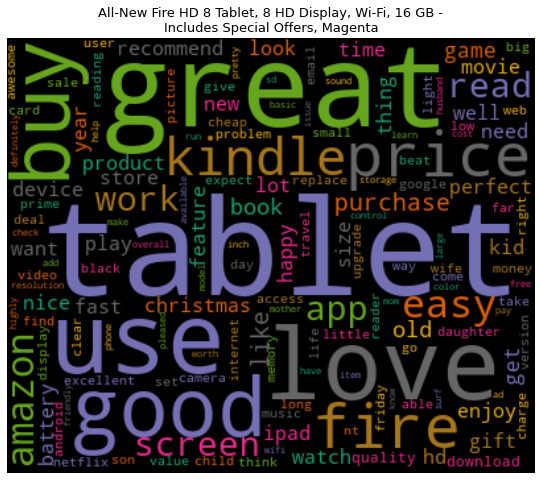

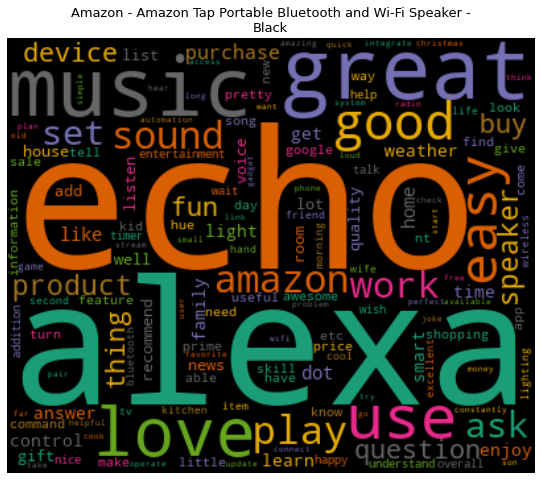

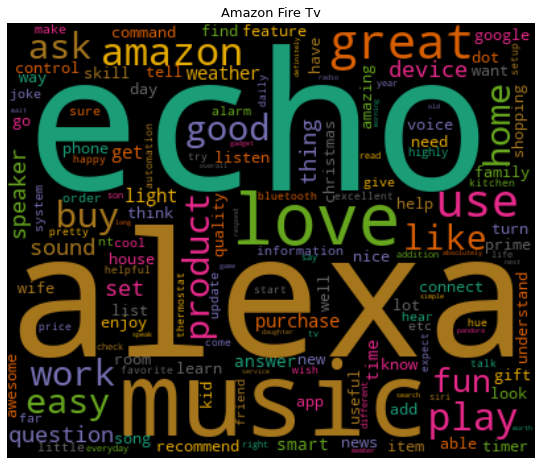

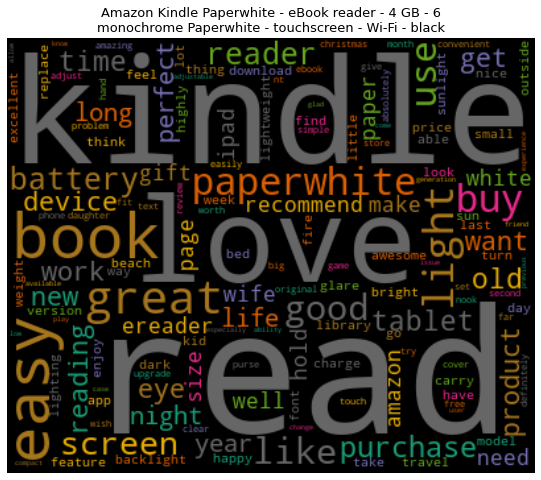

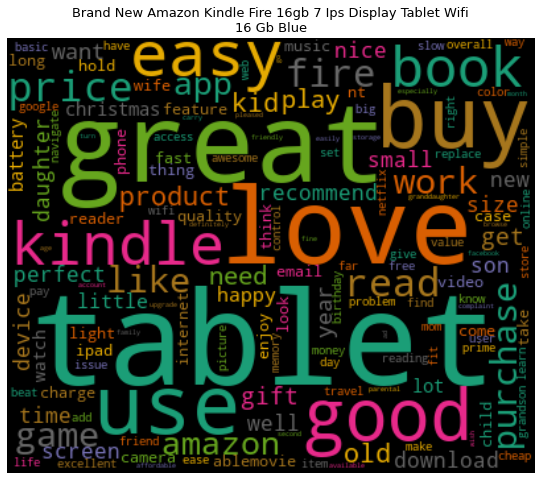

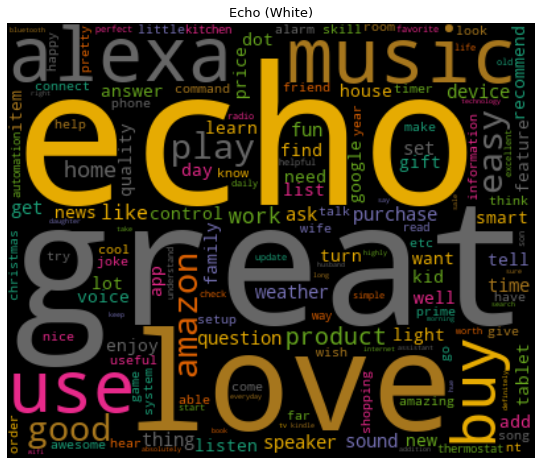

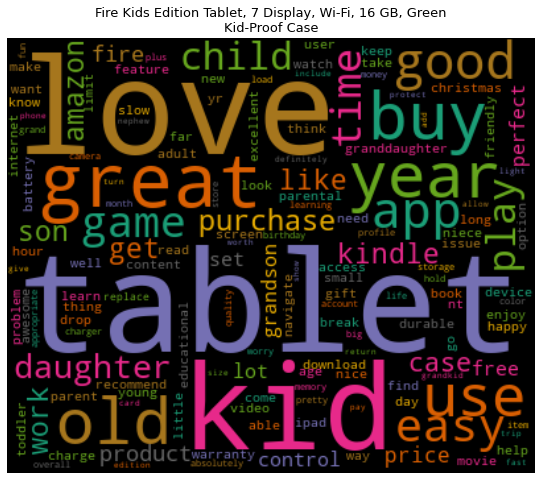

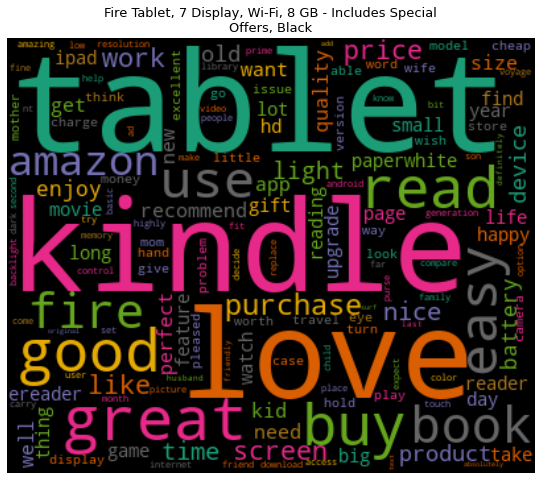

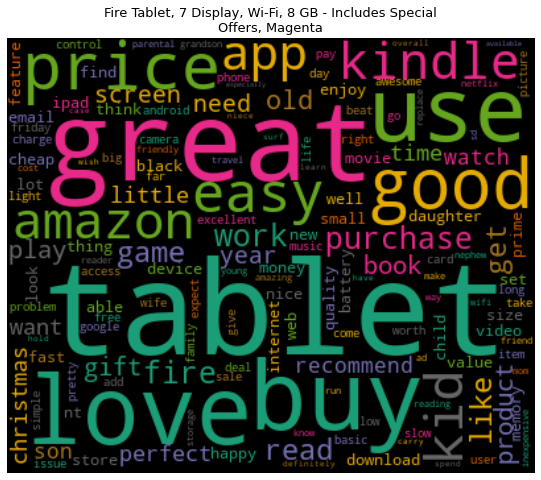

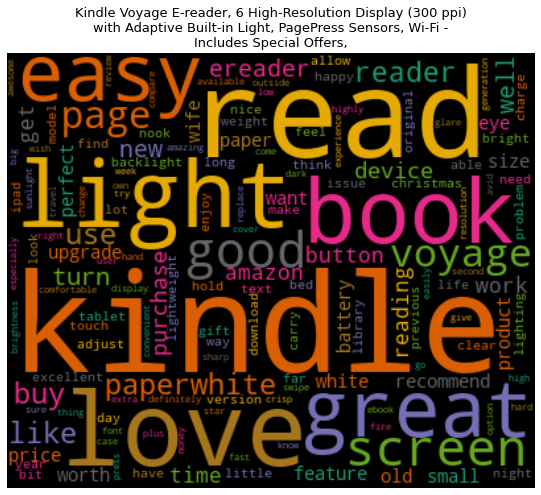

In [27]:
# Taking the Transpose of document term matrix
df_dtMatrix = df_dtMatrix.transpose()

# Now we will draw word cloud for each product
for index, product in enumerate(df_dtMatrix.columns):
    # call gene_wordcloud function to plot
    gene_wordCloud(df_dtMatrix[product].sort_values(ascending=False), product)

<font color='magenta'>From the wordcloud plot we can derive following inferences:<br>
    * The most common words are:'great', 'love', 'good'. which tells that most of the people liked the product.<br>
    * after that most frequent words are: 'use', 'easy','old','smart'etc. which tells that people find products easy to use. Some also find it old.</font>
   
<font color='green'> Now we can go deeper using sentiment analysis over text data, this also hepls for company to know which products they need to improve more.
Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python</font>
    

In [37]:
# importing textBlob
!pip install textblob
from textblob import TextBlob 

In [42]:
df1['polarity'] = df1['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [46]:
#Let’s take a look at some of the most positive and negative reviews from the customers
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df1.iloc[df1['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
      print('-->Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
-->Review 1:
 Purchased 3 of these for the kids for Christmas and had to come back and get one for myself as well! Awesome product
-->Review 2:
 It's a 16 GB mini-computer and camera perfect for trips.
-->Review 3:
 I decided to buy an Amazon echo for my wife on Mother's Day. She was really impressed how well it functioned, and how knowledgeable Alexa is. Everyone should have one of these!


In [47]:
# Now printing three reviews with lowest polarity(most negative)
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df1.iloc[df1['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('-->Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
-->Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
-->Review 2:
 Reason I wouldn't give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 can't beat it
-->Review 3:
 I really like the Paperwhite, it made me want to read books on my Kindle again. Try it if you hate it, return it, but get your hands on this for a while, and I'm convinced you will keep it.


### Now we can draw a bar graph for each product to understand it thoroughly using the polarity

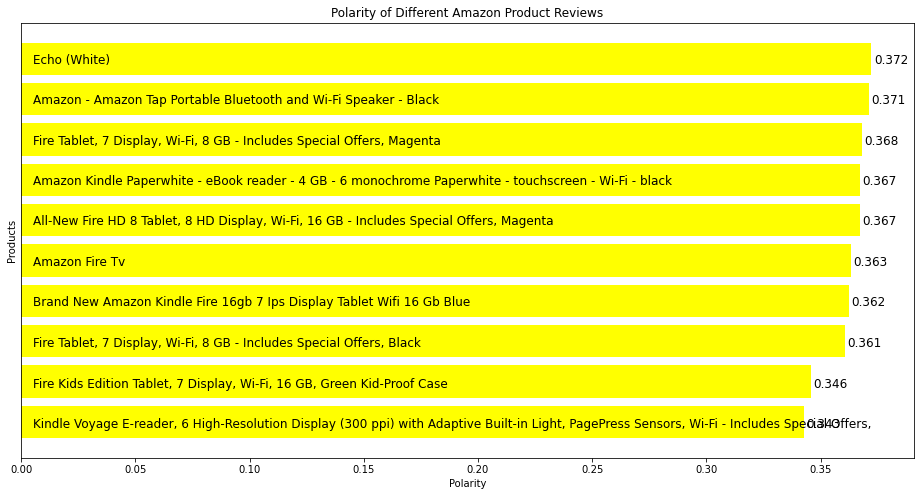

In [51]:
product_polarity_sorted=pd.DataFrame(df1.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='yellow',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
      plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=12,color='black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
      plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=12,color='black')
plt.yticks([])
plt.show()

We can see that according to the polarity of reviews, Amazon needs to improve Fire Kids Edition Tablet and Kindle Voyage E-reader. <br>Let’s also take a look at the number of reviewers who recommended a particular product. For this, we can take the percentage of reviewers and plot that

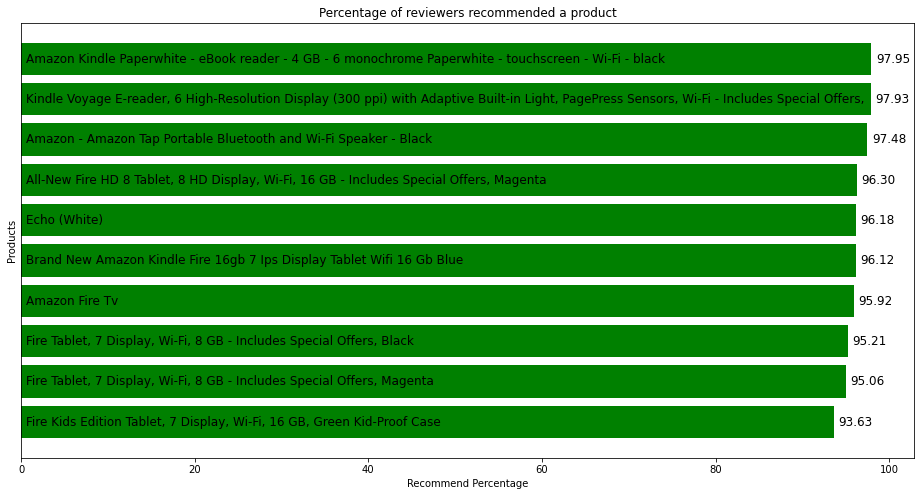

In [52]:
recommend_percentage=pd.DataFrame(((df1.groupby('name')['reviews.doRecommend'].sum()*100)/df1.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
      plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=12,color='black')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=12,color='black')

plt.yticks([])
plt.show()


<font color='purple'>Here, we can see that the Fire Kids Edition Tablet has the lowest recommendation percentage. It’s reviews also have the lowest polarity. So, we can say that the</font> <font color='red'>polarity of reviews affects the chances of a product getting recommended.</font>

Another thing that we can look at is the readability of reviews upvoted as helpful by others.
For this, we can use the <font color='red'>textstat library</font> in Python. Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [55]:
!pip install textstat
import textstat

df1['dale_chall_score']=df1['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df1['flesh_reading_ease']=df1['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df1['gunning_fog']=df1['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df1[df1['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df1[df1['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df1[df1['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df1[df1['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df1[df1['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df1[df1['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 6.185085599194361
Dale Chall Score of not upvoted reviews=> 5.736537489796711
Flesch Reading Score of upvoted reviews=> 81.8483081570997
Flesch Reading Score of not upvoted reviews=> 84.60717456368796
Gunning Fog Index of upvoted reviews=> 7.924934541792548
Gunning Fog Index of not upvoted reviews=> 6.833838379912154


<font color='green'>As we can see there is very little difference in the Dale Chall Score and the Flesch Reading Score for helpful and not helpful reviews. But there is a considerable amount of variation in the Gunning Fog Index

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the <font color='red'>text_standard() function</font>. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.</font>



In [56]:
df1['text_standard']=df1['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df1[df1['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df1[df1['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


<font color='magenta'> We can see that both the text are understandable by anyone who has completed 5th or 6th grade</font><br>

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the <font color='red'>reading_time() function</font>, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [57]:
df1['reading_time']=df1['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df1[df1['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df1[df1['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews=> 3.440845921450151
Reading Time of not upvoted reviews=> 1.7926897811637579


<font color='green'> It is quite surprising to see that upvoted reviews have more reading time. This means people find it helpful reading longer reviews.</font>

### So its done now. We can summaries our analysis as below:
<font color='magenta'>1. Most of the people love the products.<br>2. Most of them find easy to use.<br>3.Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product<br>4.The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school.<br>5.The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful</font>